In [1]:
%matplotlib inline
import astropy as ast
import numpy as np
from astropy.io import fits
from astropy.stats import mad_std
import matplotlib.pyplot as plt
from photutils.detection import DAOStarFinder
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
from photutils.psf import IterativelySubtractedPSFPhotometry
from photutils.psf.sandbox import DiscretePRF
from astropy.table import Table
from photutils.aperture import aperture_photometry
from acstools import acszpt     

In [2]:
tab_coorx = []
tab_coory = []
tab_nom = []

with open('/home/selin/Documents/M33/M33 NW/M33_NW_px','r') as a_file :
    
    for line in a_file :
        line = line.split(',')
        tab_coorx.append(int(float(line[1])))
        tab_coory.append(int(float(line[0])))
        tab_nom.append(line[2])
        
tab_coorx = np.asarray(tab_coorx)
tab_coory = np.asarray(tab_coory)

In [3]:
#Cette partie nous permet de trouver PHOTFLAM et PHOTZPT pour obtenir la magnitude                                                  

# Specify the date, must be in ISO Format (YYYY-MM-DD)
date = '2018-01-20'                                                               

# Specify the detector
detector = 'WFC'                                                                  

# Create an instance of the Query class
q = acszpt.Query(date=date, detector=detector)                                    

# Fetch the results for all filters
zpt_table = q.fetch()

# Create an instance and search for a specific filter
q_filter = acszpt.Query(date=date, 
                        detector=detector, 
                        filt='F814W')

# Fetch the results for the F435W filter
filter_zpt = q_filter.fetch()

filter_zpt

INFO:acszpt.Query:Checking inputs...
INFO:acszpt.Query:Submitting request to https://acszeropoints.stsci.edu/results_all/?date=2018-01-20&detector=WFC
INFO:acszpt.Query:Parsing the response and formatting the results...
INFO:acszpt.Query:Checking inputs...
INFO:acszpt.Query:Submitting request to https://acszeropoints.stsci.edu/results_single/?date1=2018-01-20&detector=WFC&WFC_filter=F814W
INFO:acszpt.Query:Parsing the response and formatting the results...


FILTER,PHOTPLAM,PHOTFLAM,STmag,VEGAmag,ABmag
,Angstrom,erg / (Angstrom cm2 s),mag(ST),mag,mag(AB)
str9,float64,float64,float64,float64,float64
F814W,8045.5,7.099e-20,26.772,25.508,25.936


In [4]:
abmag = 26.044
abmag2 = 25.936

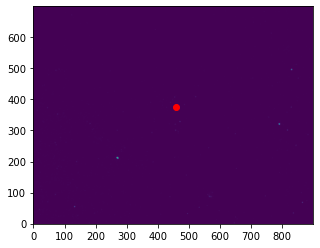

In [185]:
#Je recupere le fits en F475W et F814W

#hdu = fits.getdata('/home/selin/Documents/M33/HST/M33-B02-F12-F475W/hst_14610_27_acs_wfc_f475w_jdb627_drc.fits')
#hdu2 = fits.getdata('/home/selin/Documents/M33/HST/M33-B02-F12-F814W/hst_14610_27_acs_wfc_f814w_jdb627_drc.fits')

#hdu = fits.getdata('/home/selin/Documents/M33/HST/M33-B01-F18-F475W/hst_14610_15_acs_wfc_f475w_jdb615_drc.fits')
#hdu2 = fits.getdata('/home/selin/Documents/M33/HST/M33-B01-F18-F814W/hst_14610_15_acs_wfc_f814w_jdb615_drc.fits')

#hdu = fits.getdata('/home/selin/Documents/M33/HST/M33-B02-F06-F475W/hst_14610_21_acs_wfc_f475w_jdb621_drc.fits')
#hdu2 = fits.getdata('/home/selin/Documents/M33/HST/M33-B02-F06-F814W/hst_14610_21_acs_wfc_f814w_jdb621_drc.fits')

#hdu = fits.getdata('/home/selin/Documents/M33/HST/M33-B02-F17-F475W/hst_14610_32_acs_wfc_f475w_jdb632_drc.fits')
#hdu2 = fits.getdata('/home/selin/Documents/M33/HST/M33-B02-F17-F814W/hst_14610_32_acs_wfc_f814w_jdb632_drc.fits')

#hdu = fits.getdata('/home/selin/Documents/M33/HST/M33-B02-F11-F475W/hst_14610_26_acs_wfc_f475w_jdb626_drc.fits')
#hdu2 = fits.getdata('/home/selin/Documents/M33/HST/M33-B02-F11-F814W/hst_14610_26_acs_wfc_f814w_jdb626_drc.fits')

#hdu = fits.getdata('/home/selin/Documents/M33/HST/M33-B01-F17-F475W/hst_14610_14_acs_wfc_f475w_jdb614_drc.fits')
#hdu2 = fits.getdata('/home/selin/Documents/M33/HST/M33-B01-F17-F814W/hst_14610_14_acs_wfc_f814w_jdb614_drc.fits')

hdu = fits.getdata('/home/selin/Documents/M33/HST/M33-B02-F16-F475W/hst_14610_31_acs_wfc_f475w_jdb631_drc.fits')
hdu2 = fits.getdata('/home/selin/Documents/M33/HST/M33-B02-F16-F814W/hst_14610_31_acs_wfc_f814w_jdb631_drc.fits')

#hdu = fits.getdata('/home/selin/Documents/M33/HST/M33-B01-F11-F475W/hst_14610_08_acs_wfc_f475w_jdb608_drc.fits')
#hdu2 = fits.getdata('/home/selin/Documents/M33/HST/M33-B01-F11-F814W/hst_14610_08_acs_wfc_f814w_jdb608_drc.fits')

#Je garde une region carree autour de mon etoile et je convertis en array de float

#data = hdu[2400:3100,4000:4800].astype(float) #y dabord x ensuite
data = hdu[4300:5000,2600:3500].astype(float)
data2 = hdu2[4300:5000,2600:3500].astype(float)

n=40
nom = tab_nom[n]

wr_x = 3058 - 2600
wr_y = 4674 - 4300


plt.scatter(wr_x,wr_y,color='r') #x dabord y ensuite


#plt.xlim(0,100)
#plt.ylim(600,700)
plt.imshow(data)
plt.gca().invert_yaxis()

In [186]:
#Je soustrais une estimee de background qui correpsond a la mediane de mon image
data -= np.median(data)  
data2 -= np.median(data2)  

#J estime le sigma du background 
bkg_sigma = mad_std(data) 
bkg_sigma2 = mad_std(data2) 


#Je definis les procedes de selection des sources a chercher comme indiquee dans le tuto de photutils
#Je prend 10*sigma comme threshold

daofind = DAOStarFinder(fwhm=4., threshold=10.*bkg_sigma)
sources = daofind(data)

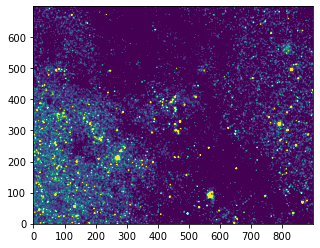

In [187]:
plt.imshow(data,vmin=0,vmax=1)
plt.gca().invert_yaxis()

(224.0, 524.0)

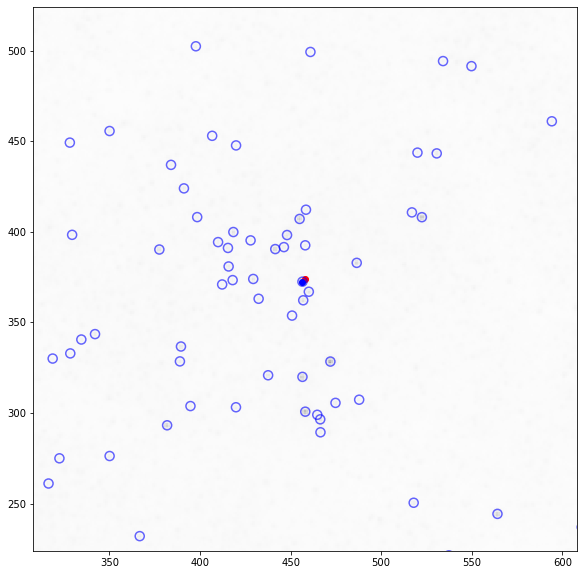

In [192]:
#Aperture photometry pour extraire aperture_sum

#On considere les positions des sources trouvees precedemment, on prend un rayon de 4px et un aperture circulaire
#On considere les sources de F475W pour F814W

positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=2.5)
phot_table = aperture_photometry(data, apertures)
phot_table2 = aperture_photometry(data2, apertures)

figure = plt.figure(figsize=(18,10))
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', norm=norm, interpolation='nearest')

#wr_index = 1259

plt.scatter(wr_x,wr_y,color='r')


plt.scatter(positions[448][0],positions[448][1],color='b') #on trouve l etoile

apertures.plot(color='blue', lw=1.5, alpha=0.6)

plt.xlim(wr_x-150,wr_x+150)
plt.ylim(wr_y-150,wr_y+150)
#plt.gca().invert_yaxis()

In [190]:
wr_y,wr_x

(374, 458)

In [191]:
#On cherche a quelle index correspond la WR

for i in range(len(positions)):
    if wr_x-5 < positions[i][0] < wr_x+5:
        print(i,positions[i])

255 [455.15067209 213.80215002]
355 [458.08496962 300.77709591]
374 [456.5235786  319.98863766]
431 [456.94825977 362.25024974]
438 [460.03557303 366.96919244]
448 [456.51499335 372.52466815]
470 [458.06280154 392.58786356]
481 [454.95370539 407.14292292]
485 [458.4682941  412.23637928]
558 [460.93280883 499.29999178]


In [193]:
#On convertit aperture_sum en instrumental magnitude
#0.05 arcsec/pixel donc rayon de 2.5 pixel = 0.1025 arcsec donc correction 0.67 et 0.611 pour F475W et F814W

ap_sum = np.asarray(phot_table['aperture_sum'])
mag = - 2.5 * np.log10(ap_sum * 0.67) + abmag

ap_sum2 = np.asarray(phot_table2['aperture_sum'])
mag2 = - 2.5 * np.log10(ap_sum2 * 0.611) + abmag2

<ipython-input-193-4a38aa6aab0e>:8: RuntimeWarning: invalid value encountered in log10
  mag2 = - 2.5 * np.log10(ap_sum2 * 0.611) + abmag2


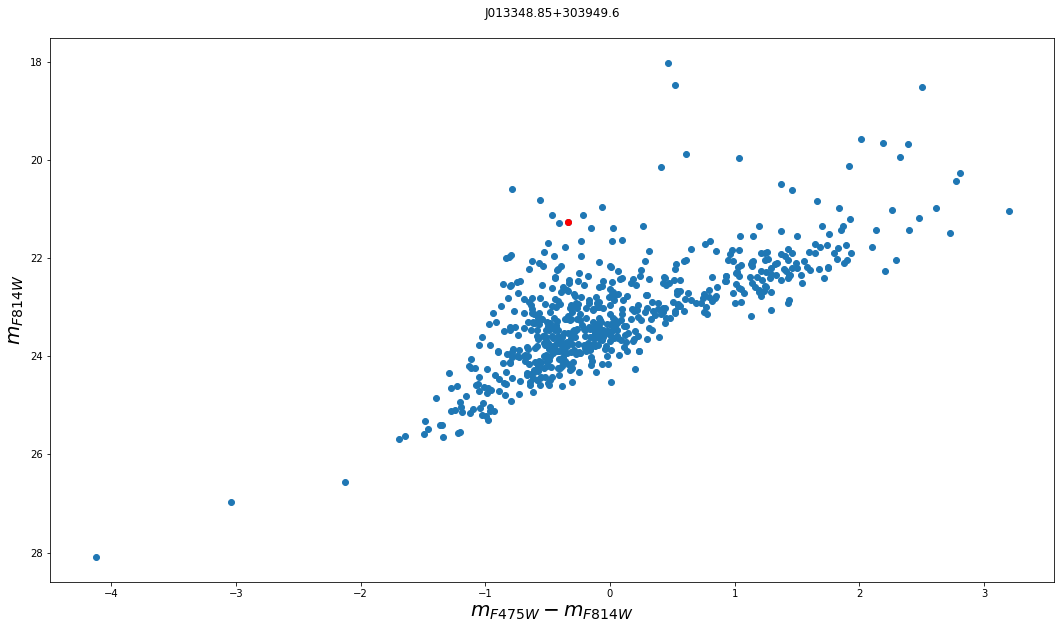

In [194]:
figure = plt.figure(figsize=(18,10))
plt.scatter(mag-mag2,mag2)
plt.scatter(mag[448]-mag2[448],mag2[448],color='r')

plt.xlabel(r'$m_{F475W} - m_{F814W}$',fontsize=20)
plt.ylabel(r'$m_{F814W}$',fontsize=20)
plt.gca().invert_yaxis()
plt.title('{}'.format(nom))
plt.savefig("HR_{}.png".format(nom))

In [11]:
print('m(AB) F475W :', mag[wr_index], ' m(AB) F814W :', mag2[wr_index])

m(AB) F475W : 17.84718279958975  m(AB) F814W : 18.449370526596887
